In [1]:
# import sql alchemy dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Another way to Explore the database using inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Get a list of column names and types for 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Get a list of column names and types for 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# save  a reference to 'measurement' and 'station' classes
Measurement = Base.classes.measurement
Station = Base.classes.station

 # Precipitation Analysis


In [10]:
# * Design a query to retrieve the last 12 months of precipitation data.

# * Select only the `date` and `prcp` values.

# * Load the query results into a Pandas DataFrame and set the index to the date column.

# * Sort the DataFrame values by `date`

# * Plot the results using the DataFrame `plot` method.

# * Use Pandas to print the summary statistics for the precipitation data.

In [11]:
session = Session(bind=engine)

In [12]:
prcp_by_date = session.query(Measurement.date, Measurement.prcp).\
             filter(Measurement.date>'2016-08-23').\
             order_by(Measurement.date).all()
prcp_by_date

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
from matplotlib.ticker import IndexFormatter
%matplotlib notebook


In [14]:
df = pd.DataFrame(prcp_by_date)
# df = df.set_index("date")
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


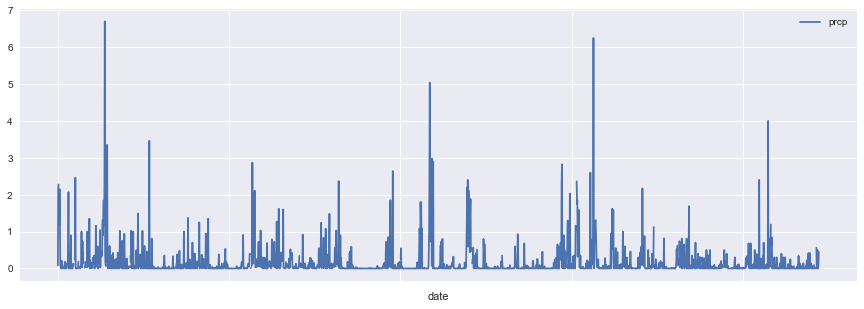

In [15]:
# plt.figure(figsize = (15,5))
df.plot(x="date",y="prcp",kind="line",grid=True,figsize=(15,5))

In [16]:
# summary statistics
summary_statistics = df.describe()
summary_statistics

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station analysis

In [17]:
# * Design a query to calculate the total number of stations.

# * Design a query to find the most active stations.

#   * List the stations and observation counts in descending order

#   * Which station has the highest number of observations?

#   * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

# * Design a query to retrieve the last 12 months of temperature observation data (tobs).

#   * Filter by the station with the highest number of observations.

#   * Plot the results as a histogram with `bins=12`.

In [18]:
# Design a query to calculate the total number of stations.
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [19]:
## Design a query to find the most active stations.
# List the stations and observation counts in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#  Which station has the highest number of observations?
sta = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
sta

('USC00519281', 2772)

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

In [22]:
# Design a query to retrieve the last 12 months of temperature observation data
temp_query = session.query(Measurement.station,Measurement.tobs).\
             filter(Measurement.date > '2016-08-23').all()
temp_query

[('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [23]:
# unzip the above list of tuples
stations,temps = zip(*temp_query)
stations_list = list(stations)
temps_list = list(temps)
temps_list

[79.0,
 80.0,
 79.0,
 77.0,
 78.0,
 78.0,
 79.0,
 80.0,
 81.0,
 80.0,
 79.0,
 75.0,
 79.0,
 76.0,
 76.0,
 80.0,
 79.0,
 78.0,
 76.0,
 78.0,
 78.0,
 75.0,
 79.0,
 80.0,
 79.0,
 81.0,
 77.0,
 77.0,
 78.0,
 76.0,
 82.0,
 81.0,
 78.0,
 80.0,
 80.0,
 79.0,
 80.0,
 80.0,
 80.0,
 79.0,
 79.0,
 79.0,
 80.0,
 80.0,
 79.0,
 78.0,
 76.0,
 75.0,
 80.0,
 80.0,
 79.0,
 80.0,
 79.0,
 78.0,
 78.0,
 80.0,
 81.0,
 79.0,
 77.0,
 79.0,
 78.0,
 77.0,
 77.0,
 78.0,
 77.0,
 78.0,
 77.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 71.0,
 72.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 75.0,
 76.0,
 76.0,
 75.0,
 72.0,
 74.0,
 75.0,
 73.0,
 76.0,
 75.0,
 68.0,
 75.0,
 75.0,
 72.0,
 69.0,
 71.0,
 68.0,
 67.0,
 69.0,
 73.0,
 70.0,
 70.0,
 70.0,
 66.0,
 67.0,
 70.0,
 66.0,
 62.0,
 71.0,
 73.0,
 69.0,
 77.0,
 74.0,
 71.0,
 72.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 73.0,
 69.0,
 66.0,
 62.0,
 66.0,
 63.0,
 62.0,
 63.0,
 64.0,
 66.0,
 60.0,
 64.0,
 63.0,
 78.0,
 67.0,
 67.0,

In [24]:
#   * Filter by the station with the highest number of observations in the last one year
temp_query2 = session.query(Measurement.station, func.count(Measurement.station)).\
              filter(Measurement.date > '2016-08-23').\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
temp_query2

('USC00519397', 360)

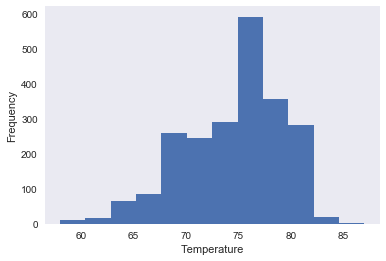

In [25]:
# Plot the results as a histogram with `bins=12'
plt.hist(x = temps_list, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid()

## Temperature Analysis (Optional)


In [26]:
# * The starter notebook contains a function called `calc_temps` that will accept a start date and end date 
# in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

# * Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip 
# using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

def calc_temps(start_date, end_date):
    temp_stats = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                 filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return temp_stats
temp_stats_list = calc_temps('2017-01-01','2017-01-10')
print(temp_stats_list)


[(60.0, 68.0327868852459, 77.0)]


<Container object of 1 artists>

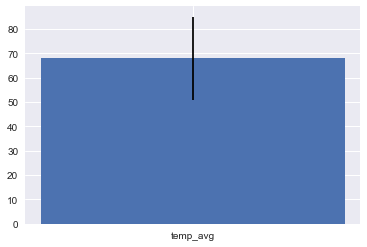

In [27]:
# * Plot the min, avg, and max temperature from your previous query as a bar chart.

#   * Use the average temperature as the bar height.

#   * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
x = 'temp_avg'
plt.bar(x=x,height= temp_stats_list[0][1],yerr =(temp_stats_list[0][2]- temp_stats_list[0][0]) )

## Miscellaneous

In [28]:
#   * Calculate the rainfall per weather station using the previous year's matching dates.
rain_query = session.query(Measurement.station, func.avg(Measurement.prcp)).\
             filter(Measurement.date>='2016-01-01').filter(Measurement.date<'2017-01-01').\
             group_by(Measurement.station).all()
rain_query

[('USC00513117', 0.14248633879781428),
 ('USC00514830', 0.09410344827586206),
 ('USC00516128', 0.5105956112852665),
 ('USC00517948', 0.07615384615384617),
 ('USC00519281', 0.21827868852459018),
 ('USC00519397', 0.04436813186813186),
 ('USC00519523', 0.09467692307692305)]

In [29]:
# * Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

#   * You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

#   * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

#   * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

#   * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

def daily_normals(inputdate):
    daily_normals_query = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                          filter(Measurement.date == func.strftime("%Y-%m-%d",inputdate)).all()
    return daily_normals_query

daily_normals('2017-08-20')

[(78.0, 79.66666666666667, 81.0)]

In [30]:
date_list = ['2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05']
daily_normals_list = []
for date in date_list:
    temp_stat = daily_normals(date)
    daily_normals_list.append(temp_stat)
daily_normals_list


[[(62.0, 69.33333333333333, 74.0)],
 [(66.0, 69.2, 74.0)],
 [(63.0, 67.66666666666667, 73.0)],
 [(62.0, 67.16666666666667, 73.0)],
 [(63.0, 67.5, 72.0)]]

In [31]:
tMin_list = []
tMax_list = []
tAvg_list = []
for row in daily_normals_list:
    tMin_list.append(row[0][0])
    tAvg_list.append(row[0][1])
    tMax_list.append(row[0][2])
tMin_list
tAvg_list
tMax_list
    

[74.0, 74.0, 73.0, 73.0, 72.0]

In [32]:
df = pd.DataFrame({"Date":date_list,
                  "TMin":tMin_list,
                  "TMax":tMax_list,
                  "TAvg":tAvg_list})
df

,Date,TAvg,TMax,TMin
0,2017-01-01,69.333333,74.0,62.0
1,2017-01-02,69.200000,74.0,66.0
2,2017-01-03,67.666667,73.0,63.0
3,2017-01-04,67.166667,73.0,62.0
4,2017-01-05,67.500000,72.0,63.0


C:\Users\Akanksha\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


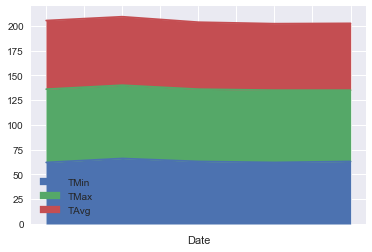

In [33]:
df.plot(kind="area",x='Date',y=['TMin','TMax','TAvg'],stacked='True')

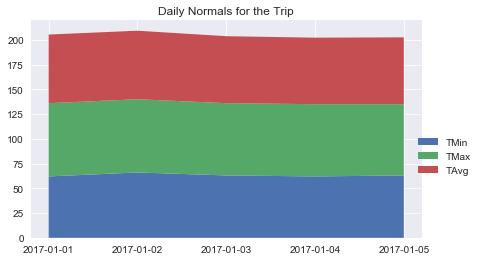

In [35]:
# Plotting using matplotlib
fig,ax = plt.subplots(figsize=(7,4))
labels = ["TMin","TMax","TAvg"]
ax.stackplot(df['Date'], df['TMin'],df['TMax'],df['TAvg'], labels=labels)
ax.grid(linestyle="-",alpha=0.8)
ax.set_title(f"Daily Normals for the Trip")
ax.legend(bbox_to_anchor=(1.15,0.5))